# 🧠 Task 3: Correlation Between News Sentiment and Stock Movement
This notebook performs sentiment analysis on financial news headlines and correlates the sentiment scores with daily stock returns. Headlines are scored using TextBlob, and returns are calculated from historical stock price data.

In [13]:
# 📦 Install dependencies
!pip install textblob
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [14]:
# 📚 Imports and Drive setup
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# 🧠 SentimentStockAnalyzer Class
class SentimentStockAnalyzer:
    def __init__(self, stock_ticker, stock_path, news_df):
        self.ticker = stock_ticker
        self.stock_path = stock_path
        self.news_df = news_df.copy()
        self.stock_df = None
        self.merged_df = None
        self.correlation = None

    def load_stock_data(self):
        self.stock_df = pd.read_csv(self.stock_path)
        self.stock_df['Date'] = pd.to_datetime(self.stock_df['Date'], errors='coerce')

    def filter_and_prepare_news(self):
        news = self.news_df[self.news_df['stock'] == self.ticker]
        news['date'] = pd.to_datetime(news['date'], errors='coerce')
        news['sentiment'] = news['headline'].apply(self._get_sentiment)
        daily_sentiment = news.groupby(news['date'].dt.date)['sentiment'].mean().reset_index()
        daily_sentiment.columns = ['Date', 'Average_Sentiment']
        daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])
        self.news_df = daily_sentiment

    def _get_sentiment(self, text):
        try:
            return TextBlob(text).sentiment.polarity
        except:
            return 0

    def compute_correlation(self):
        self.stock_df['Daily_Return'] = self.stock_df['Close'].pct_change()
        self.merged_df = pd.merge(self.stock_df, self.news_df, on='Date', how='inner')
        self.merged_df.dropna(subset=['Daily_Return', 'Average_Sentiment'], inplace=True)
        self.correlation = self.merged_df['Daily_Return'].corr(self.merged_df['Average_Sentiment'])
        return self.correlation

    def plot_correlation(self):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.merged_df['Average_Sentiment'], self.merged_df['Daily_Return'], alpha=0.6)
        plt.title(f'{self.ticker} - Sentiment vs Daily Return')
        plt.xlabel('Average Sentiment')
        plt.ylabel('Daily Return')
        plt.grid(True)
        plt.show()

    def run_full_analysis(self):
        print(f"🔍 Running sentiment-return correlation for {self.ticker}...")
        self.load_stock_data()
        self.filter_and_prepare_news()
        corr = self.compute_correlation()
        print(f"📈 Pearson Correlation ({self.ticker}): {corr:.4f}")
        self.plot_correlation()


## 🔄 Run the Analyzer for All Enriched CSVs

🔍 Running sentiment-return correlation for NVDA...


<ipython-input-16-7d8352844d0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = pd.to_datetime(news['date'], errors='coerce')


📈 Pearson Correlation (NVDA): 0.1757


<ipython-input-16-7d8352844d0b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['sentiment'] = news['headline'].apply(self._get_sentiment)


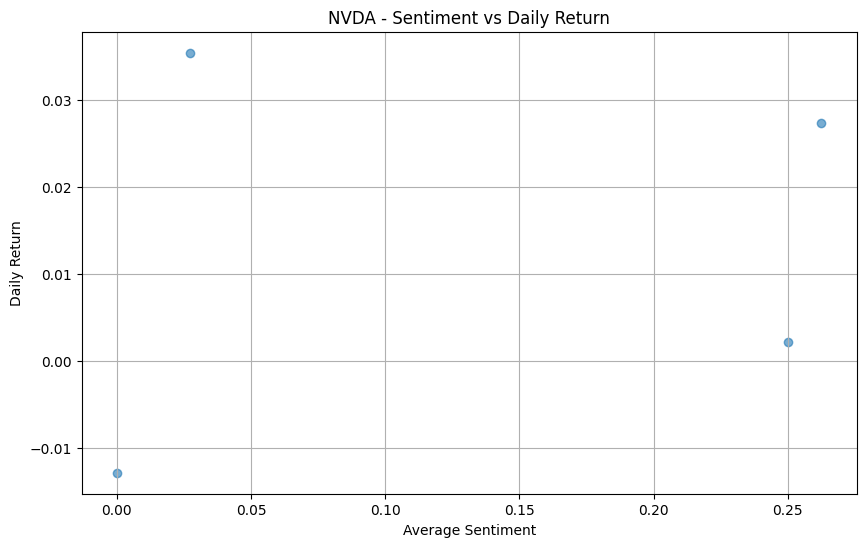

🔍 Running sentiment-return correlation for TSLA...


<ipython-input-16-7d8352844d0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = pd.to_datetime(news['date'], errors='coerce')


📈 Pearson Correlation (TSLA): nan


<ipython-input-16-7d8352844d0b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['sentiment'] = news['headline'].apply(self._get_sentiment)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


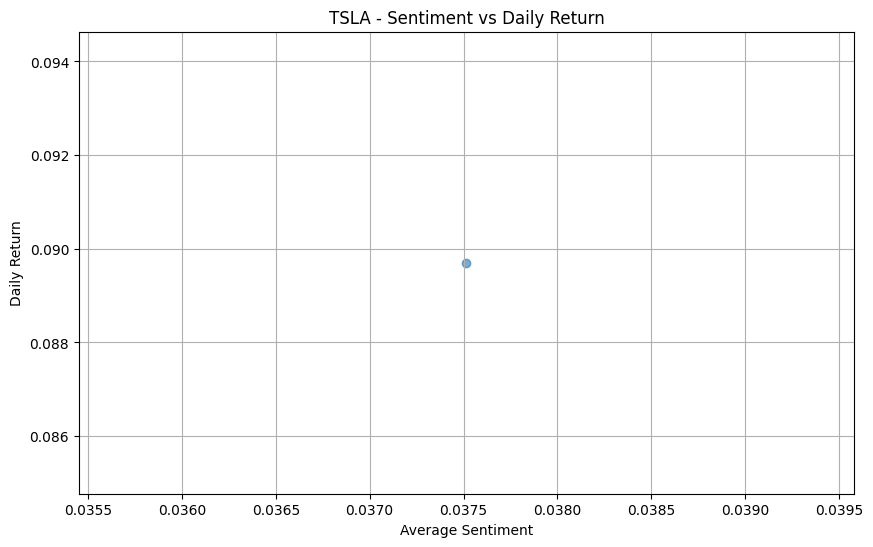

🔍 Running sentiment-return correlation for AMZN...


<ipython-input-16-7d8352844d0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = pd.to_datetime(news['date'], errors='coerce')
<ipython-input-16-7d8352844d0b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['sentiment'] = news['headline'].apply(self._get_sentiment)


📈 Pearson Correlation (AMZN): -1.0000


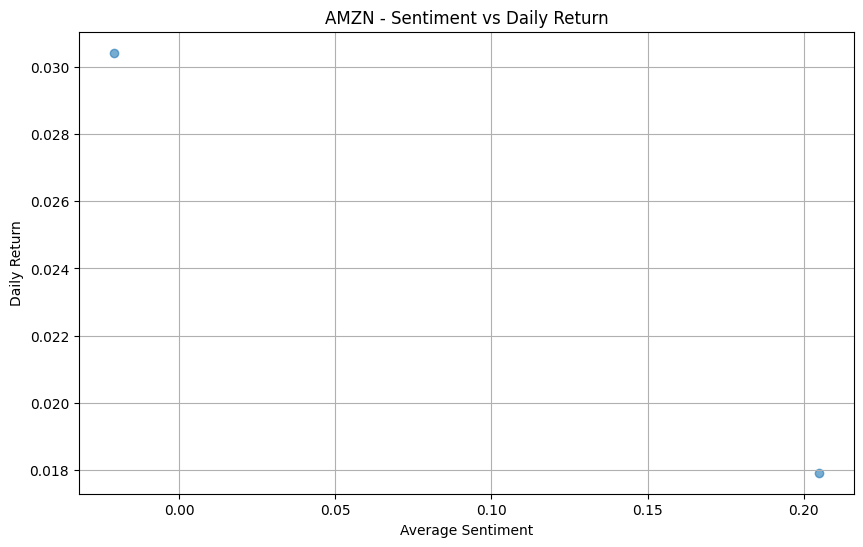

🔍 Running sentiment-return correlation for META...
📈 Pearson Correlation (META): nan


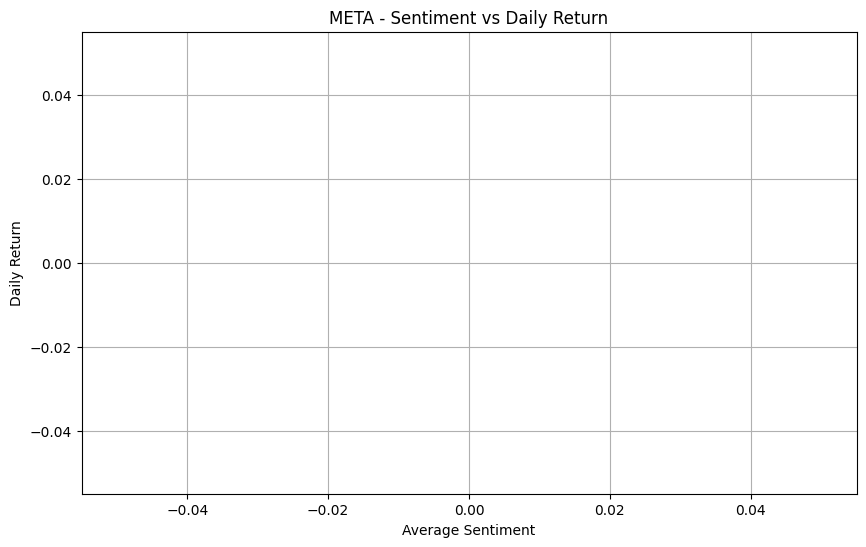

🔍 Running sentiment-return correlation for GOOG...


<ipython-input-16-7d8352844d0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = pd.to_datetime(news['date'], errors='coerce')
<ipython-input-16-7d8352844d0b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['sentiment'] = news['headline'].apply(self._get_sentiment)


📈 Pearson Correlation (GOOG): -0.0894


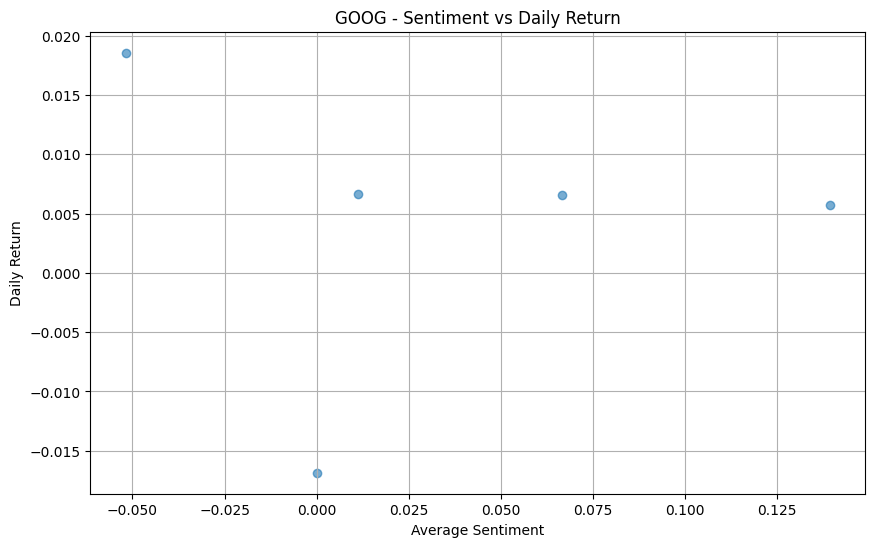

🔍 Running sentiment-return correlation for MSFT...
📈 Pearson Correlation (MSFT): nan


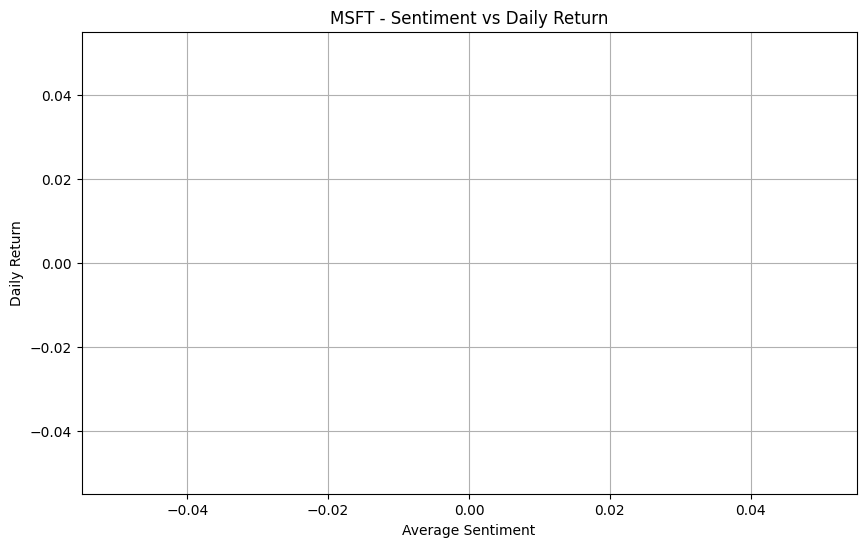

🔍 Running sentiment-return correlation for AAPL...


<ipython-input-16-7d8352844d0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = pd.to_datetime(news['date'], errors='coerce')
<ipython-input-16-7d8352844d0b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['sentiment'] = news['headline'].apply(self._get_sentiment)


📈 Pearson Correlation (AAPL): -1.0000


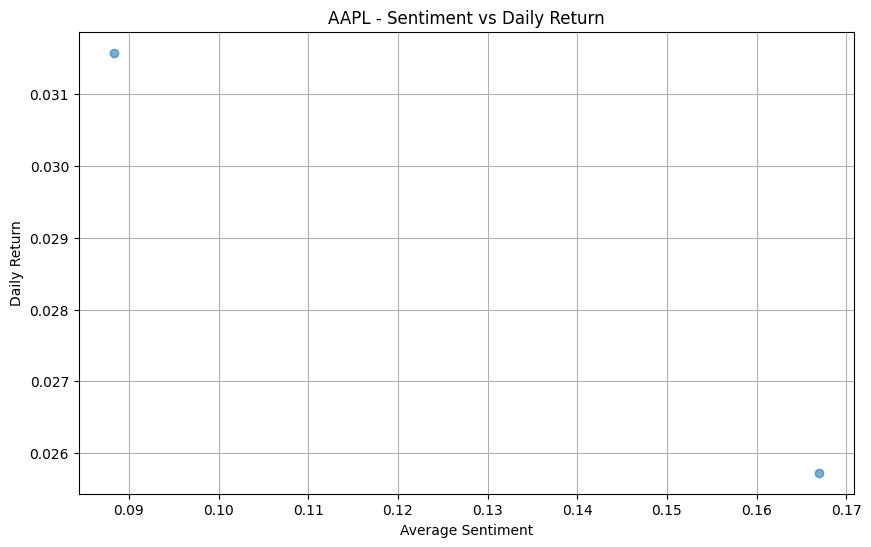

In [17]:
# 📁 File paths
news_path = '/content/drive/MyDrive/raw_analyst_ratings.csv.zip'  # Or raw CSV
news_df = pd.read_csv(news_path)

enriched_dir = '/content/drive/MyDrive/'
enriched_files = [f for f in os.listdir(enriched_dir) if f.endswith('_enriched.csv')]

# 🔁 Loop through each enriched stock file
for file in enriched_files:
    ticker = file.replace('_enriched.csv', '')
    stock_path = os.path.join(enriched_dir, file)

    analyzer = SentimentStockAnalyzer(ticker, stock_path, news_df)
    try:
        analyzer.run_full_analysis()
    except Exception as e:
        print(f"⚠️ Error analyzing {ticker}: {e}")
